In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading csv file

gold_data=pd.read_csv(r'C:\Users\Admin\Downloads\gold dataset/gld_price_data.csv')

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#Converting date column datatype from object to datetime data type
gold_data['Date']=gold_data['Date'].astype('datetime64[ns]')

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [7]:
#Checking for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#Checking for dupliocates
gold_data.duplicated().sum()

0

In [13]:
#getting statistical measures of the data
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


Correlation

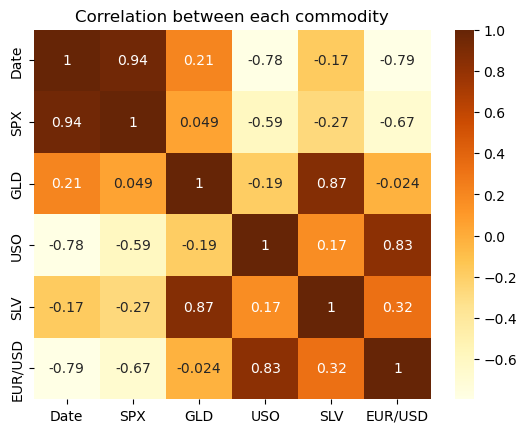

In [18]:
correlation=gold_data.corr()

sns.heatmap(correlation,annot=True,cmap='YlOrBr')
plt.title('Correlation between each commodity')
plt.show()

Getting features on basis of which GOLD price need to be predicted

In [19]:
feature=gold_data.drop(['Date','GLD'],axis=1)
feature

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


Getting only GLD data to relate with features

In [21]:
GLD=gold_data['GLD']
GLD

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Getting training data and testing data

In [24]:
feature_train,feature_test,GLD_train,GLD_test=train_test_split(feature,GLD,train_size=0.8,random_state=2)

Model Training : Random Forest Regression

In [28]:
regressor = RandomForestRegressor(n_estimators=100)


In [29]:
regressor.fit(feature_train,GLD_train)

RandomForestRegressor()

Prediction on Test data

In [33]:
test_data_prediction = regressor.predict(feature_test)

In [34]:
print(test_data_prediction)

[168.64569963  81.8354997  116.03950028 127.56150044 120.77650123
 154.73789779 149.82829922 126.01080021 117.48689889 126.00170078
 116.74260119 171.56630045 141.45939747 167.88309914 115.21040006
 117.57360069 138.70190323 170.19340138 158.58590264 160.83829916
 155.16389991 125.06320014 176.1464999  156.98560396 125.3261005
  93.97579976  78.45979998 120.69340014 119.02529921 167.42280029
  88.26990046 125.24489993  91.18810075 117.73640006 121.11849909
 136.1028006  115.58600083 115.0997009  147.32849946 107.00640091
 104.39680233  87.12889824 126.48080032 117.93580036 153.89939982
 119.59180027 108.38960019 108.12189826  93.28280107 127.00959803
  74.88070034 113.68479924 121.37730056 111.28119925 118.89089882
 120.76139956 159.87619917 168.3872012  147.19349671  85.72489868
  94.54330023  86.77189886  90.5130001  119.02570069 126.46520019
 127.40660034 170.73260003 122.17909926 117.34559899  98.37879996
 168.52520173 142.74209844 132.04370284 121.24350233 120.92159956
 119.668800

Comparing Actual values with Predicted Values in a plot

In [35]:
GLD_test=list(GLD_test)

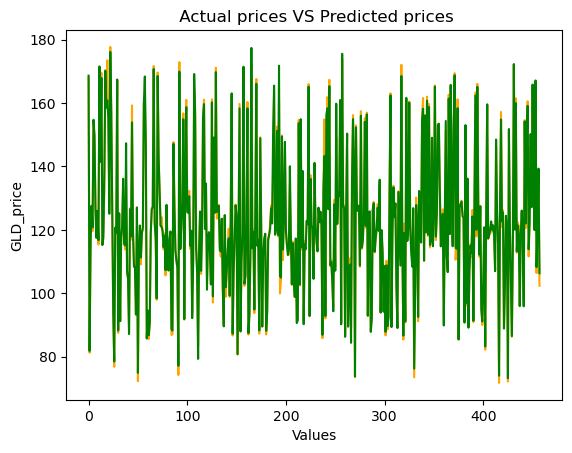

In [37]:
plt.plot(GLD_test,color='orange',label='Actual Price')
plt.plot(test_data_prection,color='green',label='Predicted Price')
plt.title(' Actual prices VS Predicted prices')
plt.xlabel('Values')
plt.ylabel('GLD_price')
plt.show()

In [40]:
# R squared error
error_score = metrics.r2_score(GLD_test, test_data_prediction)
print("R squared error score is : ", error_score)

R squared error score is :  0.9896728072508044
